In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Set display and plot styles
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
# Load the dataset
df = pd.read_csv("Cardiotocographic.csv")

In [14]:
# Show basic info
print("Initial Dataset Info:\n")
print(df.info())
print("\nFirst 5 Rows:\n")
print(df.head())

Initial Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None

First 5 Rows:

       LB    AC    FM    UC    DL    DS    DP   ASTV  MSTV   ALTV   MLTV  \
0 120.000 0.000 0.000 0.000 0.000 0.000 0.000 73.000 0.500 43.000  2.400   
1 132.000 0.006 0.000 0.006 0.

In [16]:
# Check missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [17]:
# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [18]:
print("\nMissing Values After Imputation:\n")
print(df.isnull().sum())



Missing Values After Imputation:

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [19]:
# 📊 Statistical Summary
# ===========================
summary = df.describe().T
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
summary = summary[['mean', 'std', 'median', 'IQR', 'min', '25%', '50%', '75%', 'max']]

print("\n📈 Statistical Summary:\n")
print(summary)



📈 Statistical Summary:

            mean    std  median    IQR      min     25%     50%     75%  \
LB       133.340 11.214 133.000 14.000   51.842 126.000 133.000 140.000   
AC         0.003  0.004   0.002  0.006   -0.019   0.000   0.002   0.006   
FM         0.010  0.068   0.000  0.003   -0.481   0.000   0.000   0.003   
UC         0.004  0.003   0.004  0.005   -0.015   0.002   0.004   0.007   
DL         0.002  0.003   0.000  0.003   -0.015   0.000   0.000   0.003   
DS         0.000  0.000   0.000  0.000   -0.001   0.000   0.000   0.000   
DP         0.000  0.001   0.000  0.000   -0.005   0.000   0.000   0.000   
ASTV      46.996 18.814  49.000 29.000  -63.000  32.000  49.000  61.000   
MSTV       1.364  1.174   1.200  1.000   -6.600   0.700   1.200   1.700   
ALTV      10.286 21.205   0.000 11.000  -91.000   0.000   0.000  11.000   
MLTV       8.276  7.735   7.400  6.200  -50.700   4.600   7.400  10.800   
Width     70.395 42.721  67.000 63.000 -174.000  37.000  67.000 100.000   


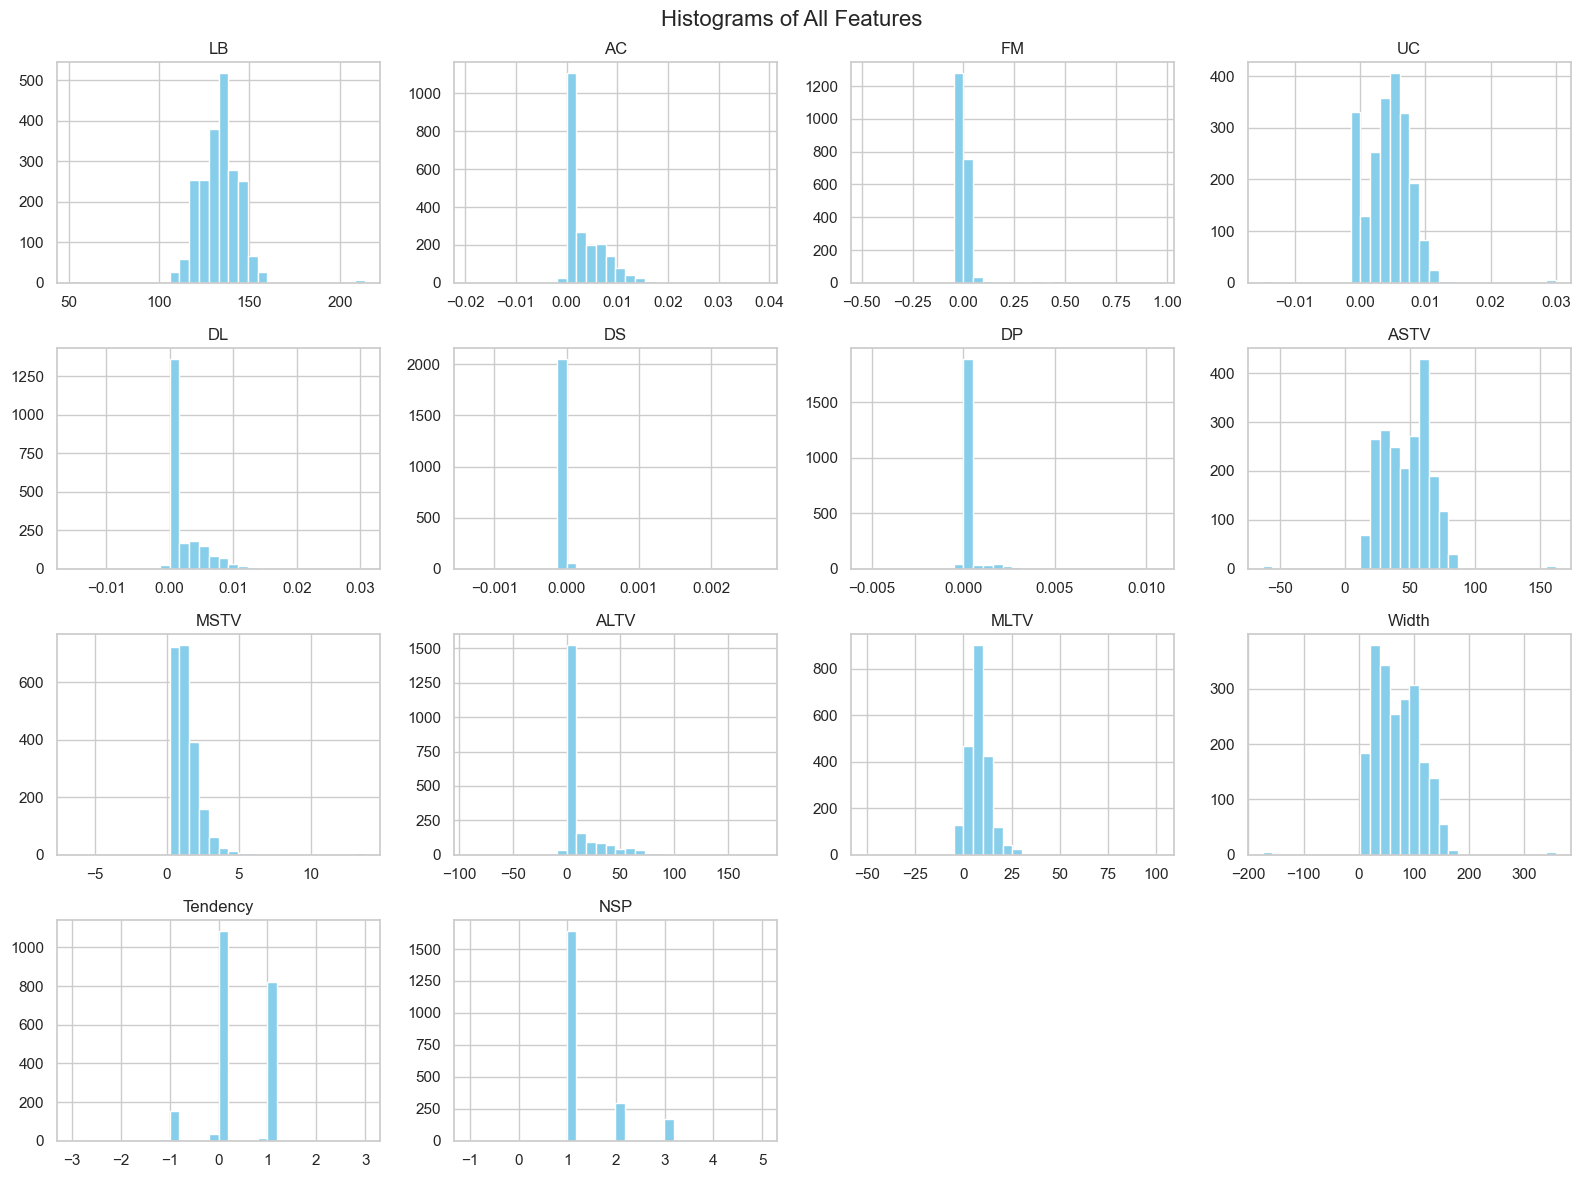

In [20]:
# 📈 Visualizations
# ===========================

# 1. Histogram of all numerical columns
df.hist(bins=30, figsize=(16, 12), color='skyblue')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()


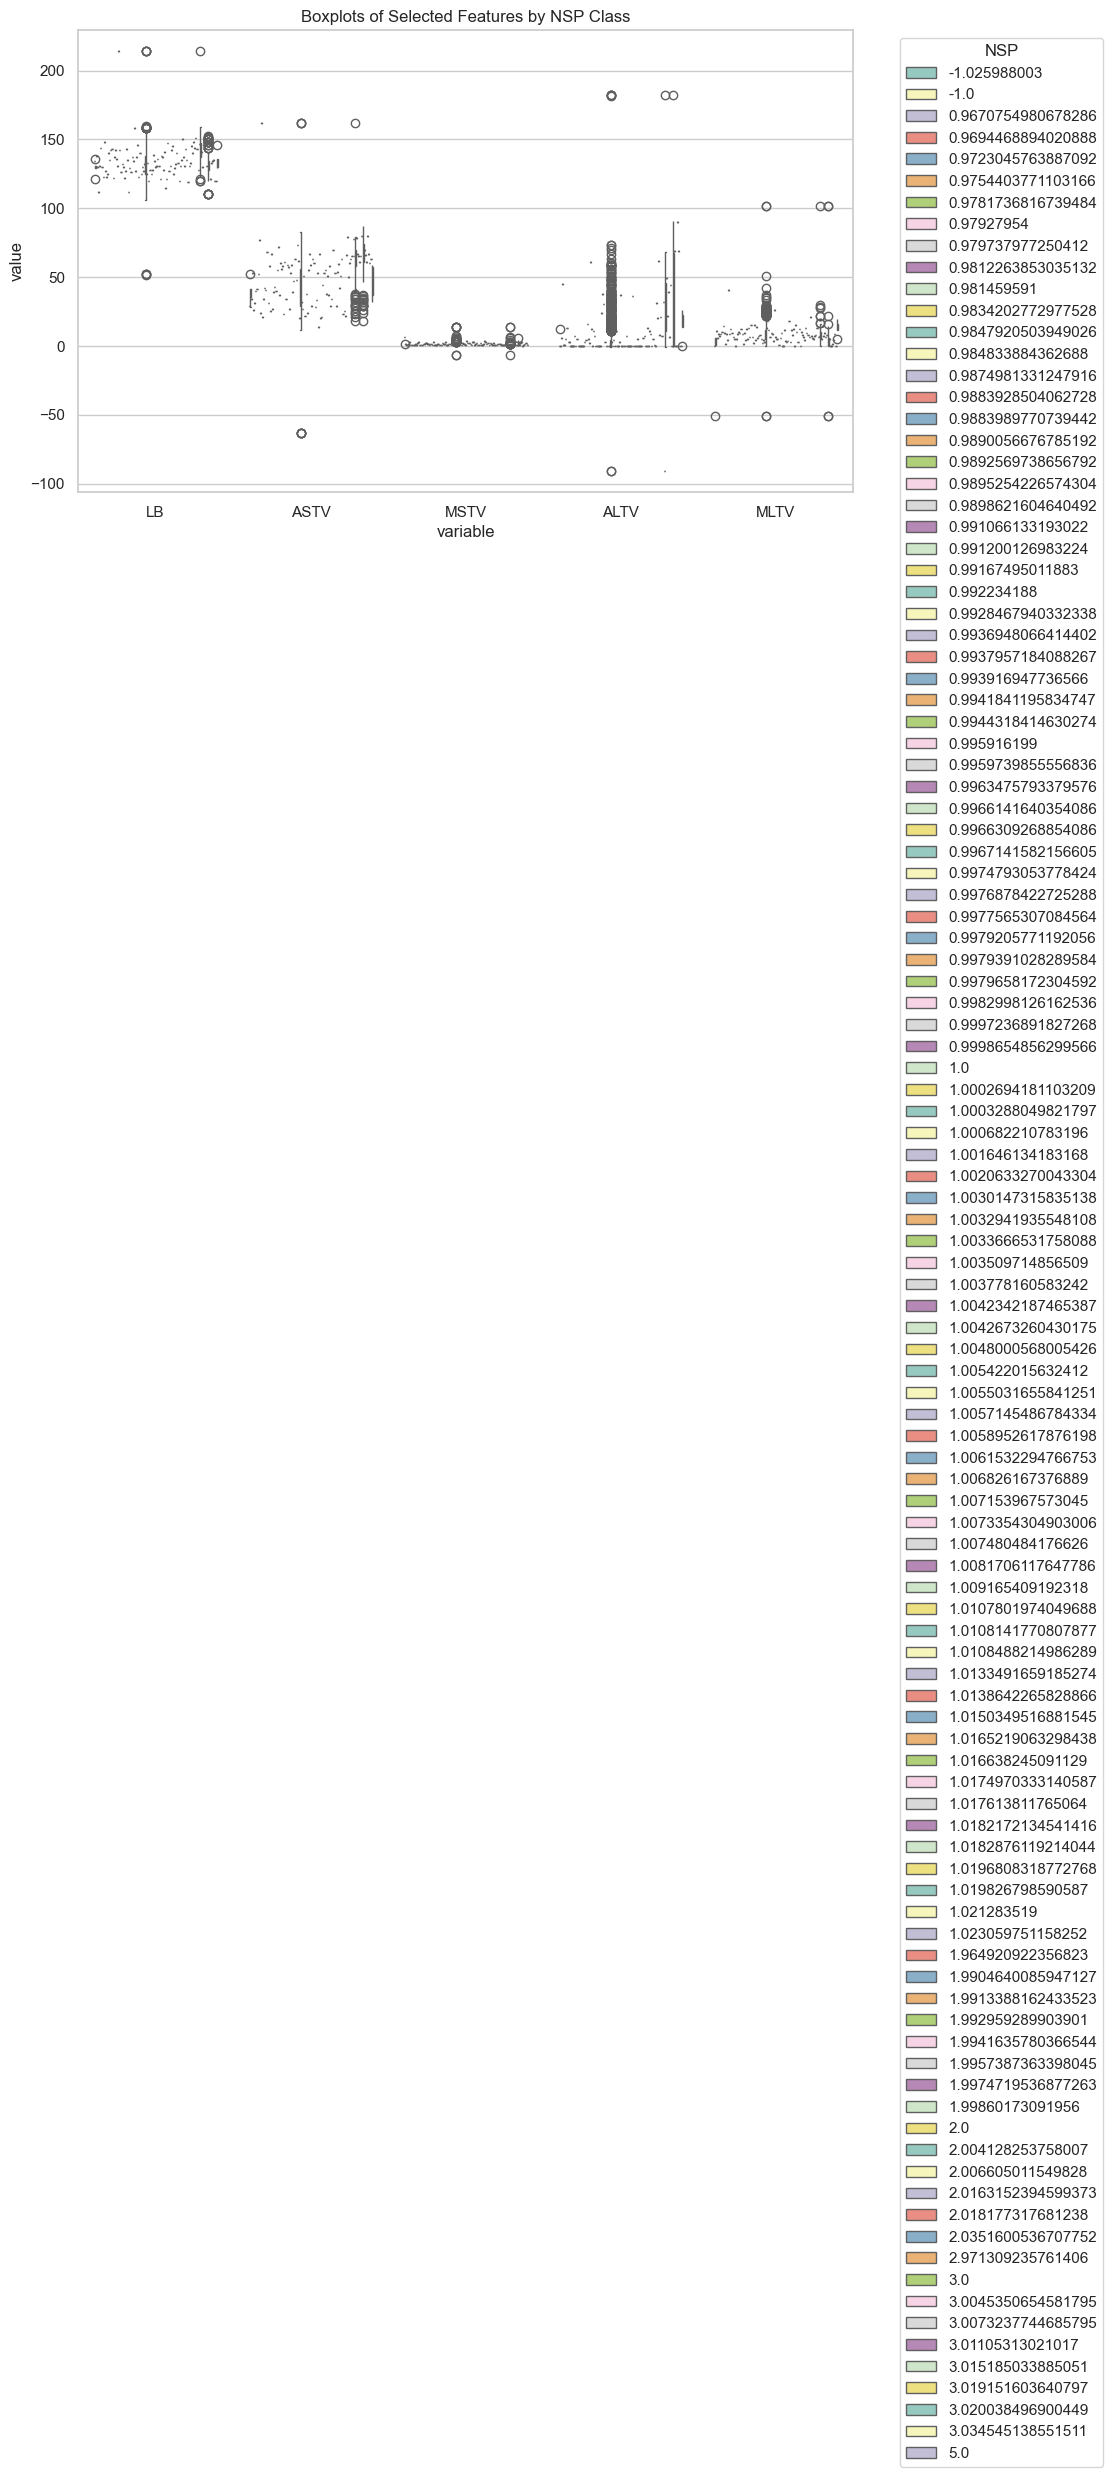

In [21]:
# 2. Boxplots for selected numerical variables
selected_cols = ['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
df_melted = df[selected_cols + ['NSP']].melt(id_vars='NSP')
sns.boxplot(x='variable', y='value', hue='NSP', data=df_melted, palette='Set3')
plt.title("Boxplots of Selected Features by NSP Class")
plt.legend(title="NSP", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

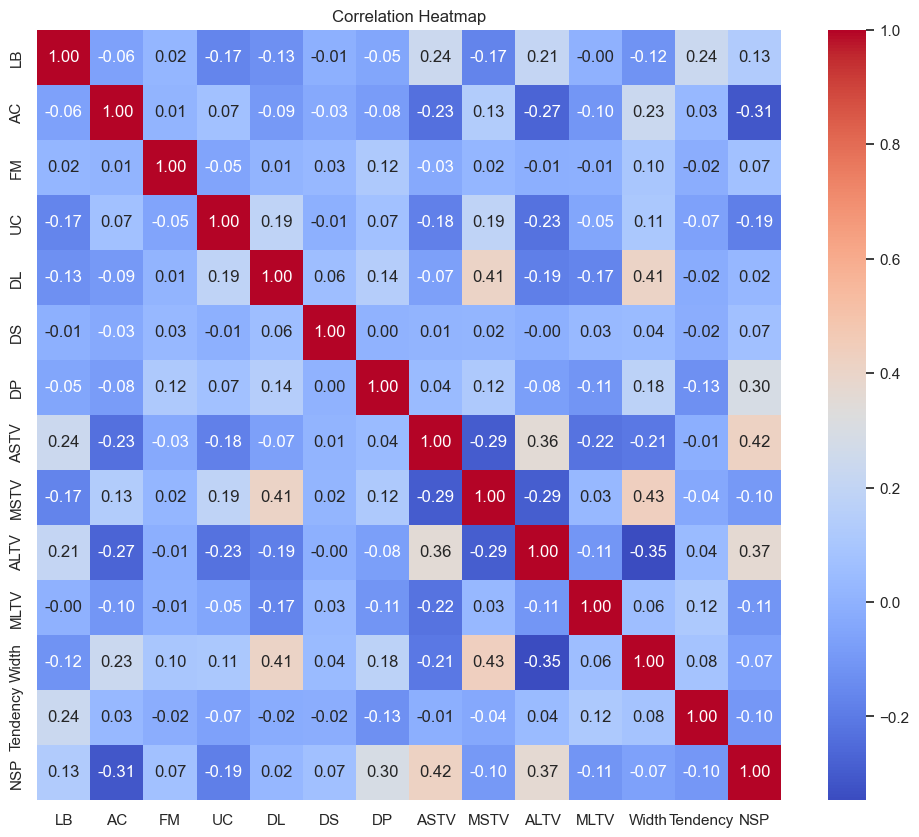

In [22]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

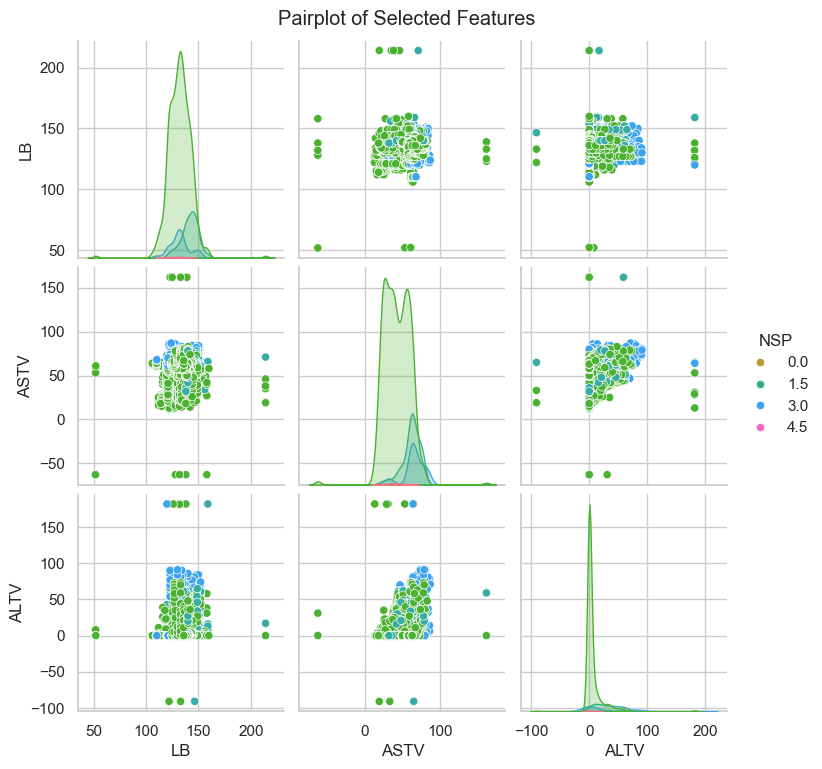

In [23]:
# 4. Pairplot (subset to avoid clutter)
subset = ['LB', 'ASTV', 'ALTV', 'NST', 'NSP'] if 'NST' in df.columns else ['LB', 'ASTV', 'ALTV', 'NSP']
sns.pairplot(df[subset], hue='NSP', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11092\2830425659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="NSP", palette="Set2")


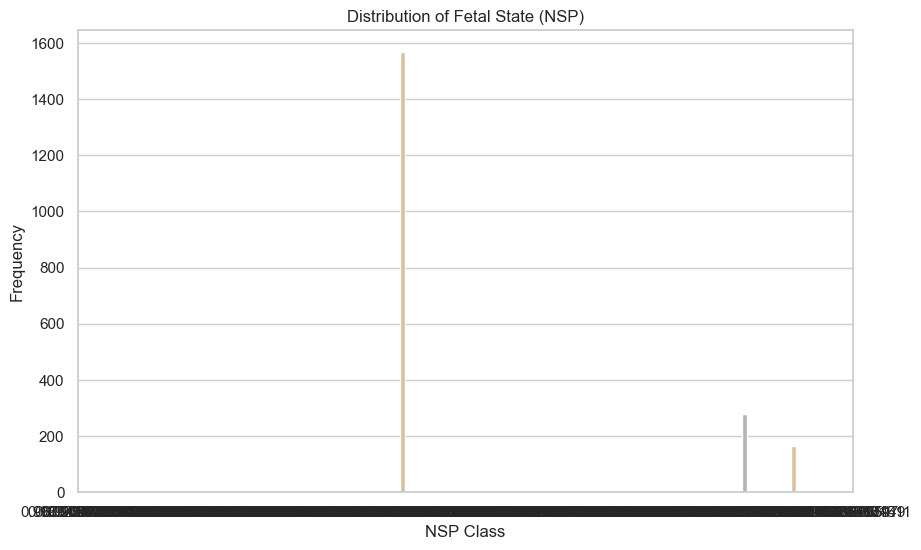

In [24]:
# 5. Categorical Visualization - NSP count
sns.countplot(data=df, x="NSP", palette="Set2")
plt.title("Distribution of Fetal State (NSP)")
plt.xlabel("NSP Class")
plt.ylabel("Frequency")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11092\3401165890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="NSP", y="ASTV", palette="coolwarm")


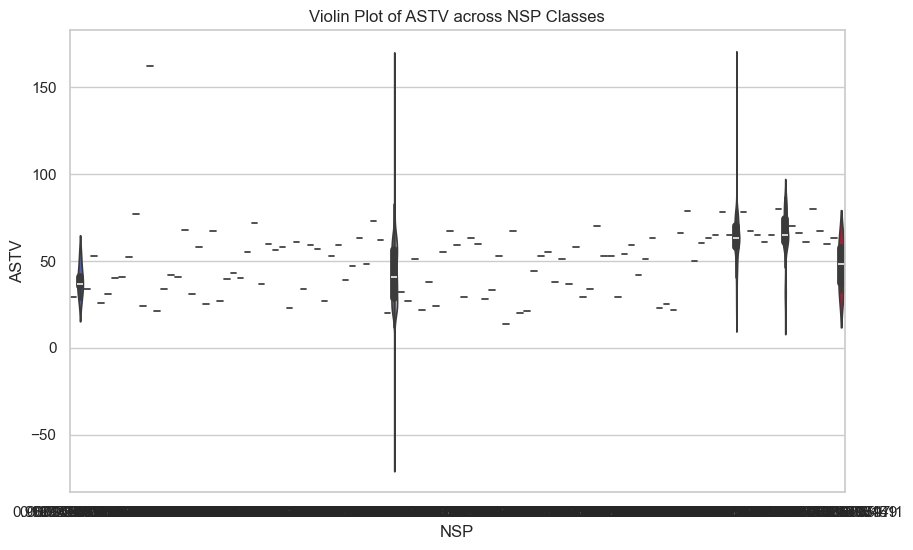

In [25]:
# 6. Violin Plot for ASTV by NSP
sns.violinplot(data=df, x="NSP", y="ASTV", palette="coolwarm")
plt.title("Violin Plot of ASTV across NSP Classes")
plt.xlabel("NSP")
plt.ylabel("ASTV")
plt.show()